# Práctica 3: Sexta prueba

Importamos las librerías necesarias.

In [1]:
from collections import Counter
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score

from imblearn.over_sampling import SMOTE

### Funciones auxiliares

In [2]:
def grafica(data, label, title, xlab, ylab):
    plt.plot(data,label, c='b')
    plt.title(title)
    plt.xlabel(xlab)
    plt.ylabel(ylab)

    plt.show()

def graf_barras(data, label, title, xlab, ylab):
    fig, ax = plt.subplots()
    ax.bar(data, label, color='c')
    ax.set_title(title)
    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)

## Lectura de datos

Leemos los datos:

In [3]:
datos = pd.read_csv("datos/train.csv", na_values=["?"])
test = pd.read_csv("datos/test.csv", na_values=["?"])

year = pd.read_csv("datos/ao.csv", na_values=["?"])
asientos = pd.read_csv("datos/asientos.csv", na_values=["?"])
ciudad = pd.read_csv("datos/ciudad.csv", na_values=["?"])
combustible = pd.read_csv("datos/combustible.csv", na_values=["?"])
consumo = pd.read_csv("datos/consumo.csv", na_values=["?"])
descuento = pd.read_csv("datos/descuento.csv", na_values=["?"])
kilometros = pd.read_csv("datos/kilometros.csv", na_values=["?"])
mano = pd.read_csv("datos/mano.csv", na_values=["?"])
motor_cc = pd.read_csv("datos/motor_cc.csv", na_values=["?"])
nombre = pd.read_csv("datos/nombre.csv", na_values=["?"])
potencia = pd.read_csv("datos/potencia.csv", na_values=["?"])
precio_cat = pd.read_csv("datos/precio_cat.csv", na_values=["?"])
tipo_marchas = pd.read_csv("datos/tipo_marchas.csv", na_values=["?"])

## Preprocesamiento

### Tratamiento de datos perdidos

Eliminamos la variable Descuento, que tiene muchos datos perdidos. Reindexamos y eliminamos la variable recien creada index. Eliminamos el resto de datos con valores perdidos.

In [4]:
p2_datos = datos.copy()
del(p2_datos['Descuento'])
p2_datos = p2_datos.dropna()
p2_datos = p2_datos.reset_index()
del(p2_datos['index'])
p2_datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3946 entries, 0 to 3945
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            3946 non-null   float64
 1   Nombre        3946 non-null   object 
 2   Ciudad        3946 non-null   object 
 3   Año           3946 non-null   float64
 4   Kilometros    3946 non-null   float64
 5   Combustible   3946 non-null   object 
 6   Tipo_marchas  3946 non-null   object 
 7   Mano          3946 non-null   object 
 8   Consumo       3946 non-null   object 
 9   Motor_CC      3946 non-null   object 
 10  Potencia      3946 non-null   object 
 11  Asientos      3946 non-null   float64
 12  Precio_cat    3946 non-null   int64  
dtypes: float64(4), int64(1), object(8)
memory usage: 400.9+ KB


## Paso de nombres a marcas

In [5]:
for i in range(len(nombre)):
    nombre["Nombre"].iloc[i] = nombre["Nombre"].iloc[i].split(' ')[0]

In [6]:
for i in range(len(p2_datos)):
    p2_datos["Nombre"].iloc[i] = p2_datos["Nombre"].iloc[i].split(' ')[0]

/home/patricia/.local/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


### Paso de valores categóricas a OneHotVectors

Nombre:

In [7]:
encNombre = OneHotEncoder(handle_unknown='ignore')
encNombre.fit(nombre["Nombre"].to_numpy().reshape(-1, 1))
aux = encNombre.transform(p2_datos["Nombre"].to_numpy().reshape(-1, 1)).toarray()
aux = pd.DataFrame(aux)

for i in range(aux.shape[1]):
    p2_datos["Nombre " + str(i)] = aux[i]
    
del(p2_datos['Nombre'])

Ciudad:

In [8]:
encCiudad = OneHotEncoder(handle_unknown='ignore')
encCiudad.fit(ciudad["Ciudad"].to_numpy().reshape(-1, 1))
aux = encCiudad.transform(p2_datos["Ciudad"].to_numpy().reshape(-1, 1)).toarray()
aux = pd.DataFrame(aux)

for i in range(aux.shape[1]):
    p2_datos["Ciudad " + str(i)] = aux[i]
    
del(p2_datos['Ciudad'])

Combustible:

In [9]:
encCombustible = OneHotEncoder(handle_unknown='ignore')
encCombustible.fit(combustible["Combustible"].to_numpy().reshape(-1, 1))
aux = encCombustible.transform(p2_datos["Combustible"].to_numpy().reshape(-1, 1)).toarray()
aux = pd.DataFrame(aux)

for i in range(aux.shape[1]):
    p2_datos["Combustible " + str(i)] = aux[i]
    
del(p2_datos['Combustible'])

Tipo_marchas:

In [10]:
encTipo_marchas = OneHotEncoder(handle_unknown='ignore')
encTipo_marchas.fit(tipo_marchas["Tipo_marchas"].to_numpy().reshape(-1, 1))
aux = encTipo_marchas.transform(p2_datos["Tipo_marchas"].to_numpy().reshape(-1, 1)).toarray()
aux = pd.DataFrame(aux)

for i in range(aux.shape[1]):
    p2_datos["Tipo_marchas " + str(i)] = aux[i]
    
del(p2_datos['Tipo_marchas'])

Mano:

In [11]:
encMano = OneHotEncoder(handle_unknown='ignore')
encMano.fit(mano["Mano"].to_numpy().reshape(-1, 1))
aux = encMano.transform(p2_datos["Mano"].to_numpy().reshape(-1, 1)).toarray()
aux = pd.DataFrame(aux)

for i in range(aux.shape[1]):
    p2_datos["Mano " + str(i)] = aux[i]
    
del(p2_datos['Mano'])

Consumo:

In [12]:
for i in range(len(p2_datos)):
    p2_datos["Consumo"].iloc[i] = float(p2_datos["Consumo"].iloc[i].strip(' kmlp'))

/home/patricia/.local/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Motor_CC:

In [13]:
for i in range(len(p2_datos)):
    p2_datos["Motor_CC"].iloc[i] = float(p2_datos["Motor_CC"].iloc[i].strip(' CC'))

Potencia:

In [14]:
for i in range(len(p2_datos)):
    p2_datos["Potencia"].iloc[i]= float(p2_datos["Potencia"].iloc[i].strip(' bhp'))

In [15]:
p2_datos["Consumo"] = p2_datos["Consumo"].astype(float)
p2_datos["Motor_CC"] = p2_datos["Motor_CC"].astype(float)
p2_datos["Potencia"] = p2_datos["Potencia"].astype(float)

In [16]:
p2_datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3946 entries, 0 to 3945
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              3946 non-null   float64
 1   Año             3946 non-null   float64
 2   Kilometros      3946 non-null   float64
 3   Consumo         3946 non-null   float64
 4   Motor_CC        3946 non-null   float64
 5   Potencia        3946 non-null   float64
 6   Asientos        3946 non-null   float64
 7   Precio_cat      3946 non-null   int64  
 8   Nombre 0        3946 non-null   float64
 9   Nombre 1        3946 non-null   float64
 10  Nombre 2        3946 non-null   float64
 11  Nombre 3        3946 non-null   float64
 12  Nombre 4        3946 non-null   float64
 13  Nombre 5        3946 non-null   float64
 14  Nombre 6        3946 non-null   float64
 15  Nombre 7        3946 non-null   float64
 16  Nombre 8        3946 non-null   float64
 17  Nombre 9        3946 non-null   f

## Normalizamos los datos

Normalizamos las variables numéricas.

Año:

In [17]:
scalerYear = MinMaxScaler()
scalerYear.fit(year["Año"].to_numpy().reshape(-1, 1))
aux = scalerYear.transform(p2_datos["Año"].to_numpy().reshape(-1, 1))
aux = pd.DataFrame(aux)
aux
p2_datos["Año"] = aux[0]

Kilómetros:

In [18]:
scalerKilometros = MinMaxScaler()
scalerKilometros.fit(kilometros["Kilometros"].to_numpy().reshape(-1, 1))
aux = scalerKilometros.transform(p2_datos["Kilometros"].to_numpy().reshape(-1, 1))
aux = pd.DataFrame(aux)
aux
p2_datos["Kilometros"] = aux[0]

Consumo:

In [19]:
for i in range(len(consumo)):
    consumo["Consumo"].iloc[i] = float(consumo["Consumo"].iloc[i].strip(' kmlp'))

scalerConsumo = MinMaxScaler()
scalerConsumo.fit(consumo["Consumo"].to_numpy().reshape(-1, 1))
aux = scalerConsumo.transform(p2_datos["Consumo"].to_numpy().reshape(-1, 1))
aux = pd.DataFrame(aux)
aux
p2_datos["Consumo"] = aux[0]

Motor_CC:

In [20]:
for i in range(len(motor_cc)):
    motor_cc["Motor_CC"].iloc[i]= float(motor_cc["Motor_CC"].iloc[i].strip(' CC'))

scalerMotor_CC = MinMaxScaler()
scalerMotor_CC.fit(motor_cc["Motor_CC"].to_numpy().reshape(-1, 1))
aux = scalerMotor_CC.transform(p2_datos["Motor_CC"].to_numpy().reshape(-1, 1))
aux = pd.DataFrame(aux)
aux
p2_datos["Motor_CC"] = aux[0]

Potencia:

In [21]:
for i in range(len(potencia)):
    potencia["Potencia"].iloc[i]= float(potencia["Potencia"].iloc[i].strip(' bhp'))

scalerPotencia = MinMaxScaler()
scalerPotencia.fit(potencia["Potencia"].to_numpy().reshape(-1, 1))
aux = scalerPotencia.transform(p2_datos["Potencia"].to_numpy().reshape(-1, 1))
aux = pd.DataFrame(aux)
aux
p2_datos["Potencia"] = aux[0]

Asientos:

In [22]:
scalerAsientos = MinMaxScaler()
scalerAsientos.fit(asientos["Asientos"].to_numpy().reshape(-1, 1))
aux = scalerAsientos.transform(p2_datos["Asientos"].to_numpy().reshape(-1, 1))
aux = pd.DataFrame(aux)
aux
p2_datos["Asientos"] = aux[0]

In [23]:
p2_datos

,id,Año,Kilometros,Consumo,Motor_CC,Potencia,Asientos,Precio_cat,Nombre 0,Nombre 1,...,Combustible 1,Combustible 2,Combustible 3,Combustible 4,Tipo_marchas 0,Tipo_marchas 1,Mano 0,Mano 1,Mano 2,Mano 3
0,1.0,0.666667,0.012743,0.697674,0.198448,0.075694,0.5,3,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,2.0,0.857143,0.000712,0.611509,0.156261,0.062457,0.5,3,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
2,3.0,0.857143,0.003974,0.754919,0.190010,0.081400,0.6,3,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,4.0,0.714286,0.008609,0.551580,0.189841,0.087105,0.5,3,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
4,5.0,0.904762,0.006432,0.557543,0.190179,0.103652,0.5,3,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3941,4813.0,0.666667,0.009205,0.453190,0.319946,0.202739,0.5,4,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3942,4814.0,0.666667,0.010312,0.448420,0.257509,0.131989,0.5,3,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
3943,4815.0,0.761905,0.012785,0.682767,0.198448,0.075694,0.5,3,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3944,4818.0,0.809524,0.010088,0.600477,0.189841,0.090643,0.5,3,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0


## Separación de objetivo y etiqueta

In [24]:
# Separamos las columnas con los datos de la etiqueta a predecir
cols = [col for col in p2_datos.columns if col not in ['Precio_cat']]
data = p2_datos[cols]
del(data['id'])
target = p2_datos['Precio_cat']

In [25]:
data.head()

,Año,Kilometros,Consumo,Motor_CC,Potencia,Asientos,Nombre 0,Nombre 1,Nombre 2,Nombre 3,...,Combustible 1,Combustible 2,Combustible 3,Combustible 4,Tipo_marchas 0,Tipo_marchas 1,Mano 0,Mano 1,Mano 2,Mano 3
0,0.666667,0.012743,0.697674,0.198448,0.075694,0.5,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.857143,0.000712,0.611509,0.156261,0.062457,0.5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
2,0.857143,0.003974,0.754919,0.190010,0.081400,0.6,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,0.714286,0.008609,0.551580,0.189841,0.087105,0.5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.904762,0.006432,0.557543,0.190179,0.103652,0.5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0


## Aplicamos Oversampling

In [26]:
data, target = SMOTE(random_state=15).fit_resample(data, target)

In [27]:
Counter(target)

Counter({3: 1798, 2: 1798, 4: 1798, 5: 1798, 1: 1798})

## Selección de hiperparámetros

Número de capas:

In [28]:
# Vectores con los valores de las métricas
accuracy = []

for i in np.linspace(1,15, num=15):
    print(i)
    knn_clf = KNeighborsClassifier(n_neighbors=int(i))
    score = cross_val_score(knn_clf, data, target, cv=5)

    s = 0
    for i in range(len(score)):
        s+= score[i]
    accuracy.append(s/len(score))

1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0
12.0
13.0
14.0
15.0


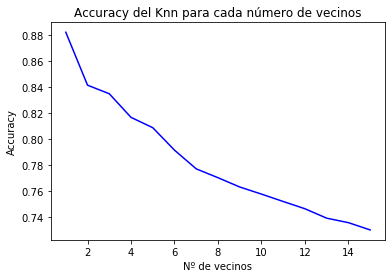

In [29]:
grafica(np.linspace(1,15, num=15), accuracy, 'Accuracy del Knn para cada número de vecinos', 'Nº de vecinos', 'Accuracy')

In [30]:
accuracy

[0.8818687430478309,
 0.8412680756395995,
 0.8347052280311458,
 0.8165739710789767,
 0.8086763070077865,
 0.7914349276974416,
 0.7770856507230256,
 0.7703003337041157,
 0.7631813125695217,
 0.7577308120133481,
 0.7520578420467185,
 0.746496106785317,
 0.7392658509454949,
 0.7358175750834259,
 0.7302558398220245]

Modelo final:

In [31]:
# Vectores con los valores de las métricas
knn_clf = KNeighborsClassifier(n_neighbors=1)
score = cross_val_score(knn_clf, data, target, cv=5)

s = 0
for i in range(len(score)):
    s+= score[i]

print("La accuracy del modelo es: " + str(s/len(score)))

La accuracy del modelo es: 0.8818687430478309


## Predicción del test

Procesamos los datos de test de la misma manera que procesamos los de entrenamiento

In [32]:
p1_test = test.copy()
del(p1_test['Descuento'])
p1_test = p1_test.dropna()
p1_test = p1_test.reset_index()
del(p1_test['index'])
p1_test

,id,Nombre,Ciudad,Año,Kilometros,Combustible,Tipo_marchas,Mano,Consumo,Motor_CC,Potencia,Asientos
0,4820,Mercedes-Benz New C-Class C 220 CDI Avantgarde,H,2015,77771,Diesel,Automatic,First,19.27 kmpl,2143 CC,170 bhp,5.0
1,4821,Hyundai i10 Magna 1.1,J,2011,62000,Petrol,Manual,First,19.81 kmpl,1086 CC,68.05 bhp,5.0
2,4822,Ford Figo Diesel EXI,C,2010,129986,Diesel,Manual,Second,20.0 kmpl,1399 CC,68 bhp,5.0
3,4823,Maruti Swift Dzire VXI Optional,D,2015,49900,Petrol,Manual,First,20.85 kmpl,1197 CC,83.14 bhp,5.0
4,4824,Maruti Ritz VXI,J,2010,75319,Petrol,Manual,Second,21.1 kmpl,1197 CC,85.80 bhp,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1154,5974,Chevrolet Beat Diesel LT,G,2012,88000,Diesel,Manual,First,25.44 kmpl,936 CC,57.6 bhp,5.0
1155,5975,Hyundai Verna CRDi,K,2010,72010,Diesel,Manual,First,16.8 kmpl,1493 CC,110 bhp,5.0
1156,5976,Mercedes-Benz A Class A180 CDI,J,2013,34000,Diesel,Automatic,Second,20.0 kmpl,2143 CC,107.3 bhp,5.0
1157,5977,BMW X1 M Sport sDrive 20d,B,2016,31000,Diesel,Automatic,First,17.05 kmpl,1995 CC,190 bhp,5.0


### HotVectors

Nombre:

In [33]:
for i in range(len(p1_test)):
    p1_test["Nombre"].iloc[i] = p1_test["Nombre"].iloc[i].split(' ')[0]

/home/patricia/.local/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [34]:
aux = encNombre.transform(p1_test["Nombre"].to_numpy().reshape(-1, 1)).toarray()
aux = pd.DataFrame(aux)

for i in range(aux.shape[1]):
    p1_test["Nombre " + str(i)] = aux[i]
    
del(p1_test['Nombre'])
p1_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1159 entries, 0 to 1158
Data columns (total 42 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            1159 non-null   int64  
 1   Ciudad        1159 non-null   object 
 2   Año           1159 non-null   int64  
 3   Kilometros    1159 non-null   int64  
 4   Combustible   1159 non-null   object 
 5   Tipo_marchas  1159 non-null   object 
 6   Mano          1159 non-null   object 
 7   Consumo       1159 non-null   object 
 8   Motor_CC      1159 non-null   object 
 9   Potencia      1159 non-null   object 
 10  Asientos      1159 non-null   float64
 11  Nombre 0      1159 non-null   float64
 12  Nombre 1      1159 non-null   float64
 13  Nombre 2      1159 non-null   float64
 14  Nombre 3      1159 non-null   float64
 15  Nombre 4      1159 non-null   float64
 16  Nombre 5      1159 non-null   float64
 17  Nombre 6      1159 non-null   float64
 18  Nombre 7      1159 non-null 

Ciudad:

In [35]:
aux = encCiudad.transform(p1_test["Ciudad"].to_numpy().reshape(-1, 1)).toarray()
aux = pd.DataFrame(aux)

for i in range(aux.shape[1]):
    p1_test["Ciudad " + str(i)] = aux[i]
    
del(p1_test['Ciudad'])
p1_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1159 entries, 0 to 1158
Data columns (total 52 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            1159 non-null   int64  
 1   Año           1159 non-null   int64  
 2   Kilometros    1159 non-null   int64  
 3   Combustible   1159 non-null   object 
 4   Tipo_marchas  1159 non-null   object 
 5   Mano          1159 non-null   object 
 6   Consumo       1159 non-null   object 
 7   Motor_CC      1159 non-null   object 
 8   Potencia      1159 non-null   object 
 9   Asientos      1159 non-null   float64
 10  Nombre 0      1159 non-null   float64
 11  Nombre 1      1159 non-null   float64
 12  Nombre 2      1159 non-null   float64
 13  Nombre 3      1159 non-null   float64
 14  Nombre 4      1159 non-null   float64
 15  Nombre 5      1159 non-null   float64
 16  Nombre 6      1159 non-null   float64
 17  Nombre 7      1159 non-null   float64
 18  Nombre 8      1159 non-null 

Combustible:

In [36]:
aux = encCombustible.transform(p1_test["Combustible"].to_numpy().reshape(-1, 1)).toarray()
aux = pd.DataFrame(aux)

for i in range(aux.shape[1]):
    p1_test["Combustible " + str(i)] = aux[i]
    
del(p1_test['Combustible'])
p1_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1159 entries, 0 to 1158
Data columns (total 56 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1159 non-null   int64  
 1   Año            1159 non-null   int64  
 2   Kilometros     1159 non-null   int64  
 3   Tipo_marchas   1159 non-null   object 
 4   Mano           1159 non-null   object 
 5   Consumo        1159 non-null   object 
 6   Motor_CC       1159 non-null   object 
 7   Potencia       1159 non-null   object 
 8   Asientos       1159 non-null   float64
 9   Nombre 0       1159 non-null   float64
 10  Nombre 1       1159 non-null   float64
 11  Nombre 2       1159 non-null   float64
 12  Nombre 3       1159 non-null   float64
 13  Nombre 4       1159 non-null   float64
 14  Nombre 5       1159 non-null   float64
 15  Nombre 6       1159 non-null   float64
 16  Nombre 7       1159 non-null   float64
 17  Nombre 8       1159 non-null   float64
 18  Nombre 9

Tipo_marchas:

In [37]:
aux = encTipo_marchas.transform(p1_test["Tipo_marchas"].to_numpy().reshape(-1, 1)).toarray()
aux = pd.DataFrame(aux)

for i in range(aux.shape[1]):
    p1_test["Tipo_marchas " + str(i)] = aux[i]
    
del(p1_test['Tipo_marchas'])
p1_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1159 entries, 0 to 1158
Data columns (total 57 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              1159 non-null   int64  
 1   Año             1159 non-null   int64  
 2   Kilometros      1159 non-null   int64  
 3   Mano            1159 non-null   object 
 4   Consumo         1159 non-null   object 
 5   Motor_CC        1159 non-null   object 
 6   Potencia        1159 non-null   object 
 7   Asientos        1159 non-null   float64
 8   Nombre 0        1159 non-null   float64
 9   Nombre 1        1159 non-null   float64
 10  Nombre 2        1159 non-null   float64
 11  Nombre 3        1159 non-null   float64
 12  Nombre 4        1159 non-null   float64
 13  Nombre 5        1159 non-null   float64
 14  Nombre 6        1159 non-null   float64
 15  Nombre 7        1159 non-null   float64
 16  Nombre 8        1159 non-null   float64
 17  Nombre 9        1159 non-null   f

Mano:

In [38]:
aux = encMano.transform(p1_test["Mano"].to_numpy().reshape(-1, 1)).toarray()
aux = pd.DataFrame(aux)

for i in range(aux.shape[1]):
    p1_test["Mano " + str(i)] = aux[i]
    
del(p1_test['Mano'])
p1_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1159 entries, 0 to 1158
Data columns (total 60 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              1159 non-null   int64  
 1   Año             1159 non-null   int64  
 2   Kilometros      1159 non-null   int64  
 3   Consumo         1159 non-null   object 
 4   Motor_CC        1159 non-null   object 
 5   Potencia        1159 non-null   object 
 6   Asientos        1159 non-null   float64
 7   Nombre 0        1159 non-null   float64
 8   Nombre 1        1159 non-null   float64
 9   Nombre 2        1159 non-null   float64
 10  Nombre 3        1159 non-null   float64
 11  Nombre 4        1159 non-null   float64
 12  Nombre 5        1159 non-null   float64
 13  Nombre 6        1159 non-null   float64
 14  Nombre 7        1159 non-null   float64
 15  Nombre 8        1159 non-null   float64
 16  Nombre 9        1159 non-null   float64
 17  Nombre 10       1159 non-null   f

### Pasar a numéricas las variables cuantitativas

Consumo:

In [39]:
for i in range(len(p1_test)):
    p1_test["Consumo"].iloc[i] = float(p1_test["Consumo"].iloc[i].strip(' kmlp'))

/home/patricia/.local/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Motor_CC:

In [40]:
for i in range(len(p1_test)):
    p1_test["Motor_CC"].iloc[i] = float(p1_test["Motor_CC"].iloc[i].strip(' CC'))

Potencia:

In [41]:
for i in range(len(p1_test)):
    p1_test["Potencia"].iloc[i]= float(p1_test["Potencia"].iloc[i].strip(' bhp'))

In [42]:
p1_test["Consumo"] = p1_test["Consumo"].astype(float)
p1_test["Motor_CC"] = p1_test["Motor_CC"].astype(float)
p1_test["Potencia"] = p1_test["Potencia"].astype(float)
p1_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1159 entries, 0 to 1158
Data columns (total 60 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              1159 non-null   int64  
 1   Año             1159 non-null   int64  
 2   Kilometros      1159 non-null   int64  
 3   Consumo         1159 non-null   float64
 4   Motor_CC        1159 non-null   float64
 5   Potencia        1159 non-null   float64
 6   Asientos        1159 non-null   float64
 7   Nombre 0        1159 non-null   float64
 8   Nombre 1        1159 non-null   float64
 9   Nombre 2        1159 non-null   float64
 10  Nombre 3        1159 non-null   float64
 11  Nombre 4        1159 non-null   float64
 12  Nombre 5        1159 non-null   float64
 13  Nombre 6        1159 non-null   float64
 14  Nombre 7        1159 non-null   float64
 15  Nombre 8        1159 non-null   float64
 16  Nombre 9        1159 non-null   float64
 17  Nombre 10       1159 non-null   f

### Normalizar:

In [43]:
aux = scalerYear.transform(p1_test["Año"].to_numpy().reshape(-1, 1))
aux = pd.DataFrame(aux)
p1_test["Año"] = aux[0]

In [44]:
aux = scalerKilometros.transform(p1_test["Kilometros"].to_numpy().reshape(-1, 1))
aux = pd.DataFrame(aux)
p1_test["Kilometros"] = aux[0]

In [45]:
aux = scalerConsumo.transform(p1_test["Consumo"].to_numpy().reshape(-1, 1))
aux = pd.DataFrame(aux)
p1_test["Consumo"] = aux[0]

In [46]:
aux = scalerMotor_CC.transform(p1_test["Motor_CC"].to_numpy().reshape(-1, 1))
aux = pd.DataFrame(aux)
p1_test["Motor_CC"] = aux[0]

In [47]:
aux = scalerPotencia.transform(p1_test["Potencia"].to_numpy().reshape(-1, 1))
aux = pd.DataFrame(aux)
p1_test["Potencia"] = aux[0]

In [48]:
aux = scalerAsientos.transform(p1_test["Asientos"].to_numpy().reshape(-1, 1))
aux = pd.DataFrame(aux)
p1_test["Asientos"] = aux[0]

### Entrenamos el modelo

In [49]:
ids = p1_test['id']
del(p1_test['id'])

In [50]:
# Vectores con los valores de las métricas
knn_clf = KNeighborsClassifier(n_neighbors=1)
knn_clf.fit(data, target)
predict = knn_clf.predict(p1_test)

In [51]:
df_result = pd.DataFrame({'id': ids, 'Precio_cat': predict})
df_result.to_csv("p3_05.csv", index=False)

In [52]:
predict = pd.read_csv("p3_05.csv", na_values=["?"])

In [53]:
predict

,id,Precio_cat
0,4820,5
1,4821,2
2,4822,2
3,4823,3
4,4824,2
...,...,...
1154,5974,3
1155,5975,3
1156,5976,4
1157,5977,5
